In [2]:
import cv2 as cv
import numpy as np
import os 

from matplotlib import pyplot as plt

In [3]:
img = cv.imread(r'C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data\kohli_main\download.jpeg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray.shape

(124, 124)

In [4]:
face_cascade = cv.CascadeClassifier(r'C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(r'C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\opencv\haarcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[  6,   6, 116, 116]])

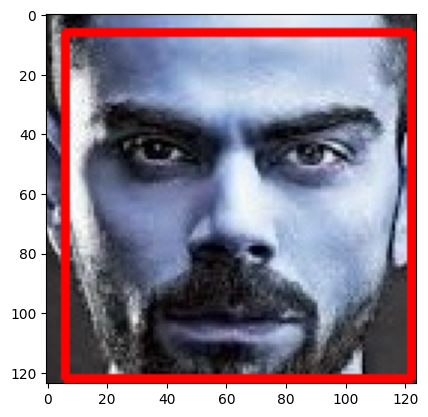

In [5]:

(x,y,w,h) = faces[0]
x,y,w,h
face_img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [6]:
import cv2
def get_cropped_img(img_path):
    img = cv2.imread(img_path)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))
    if len(faces) > 0:
        (x, y, w, h) = faces[0]
        return img[y:y+h, x:x+w]
    

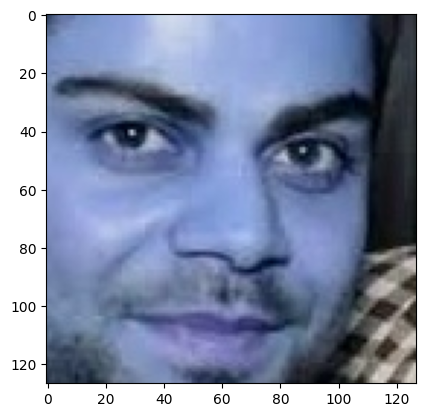

In [7]:
imgg = get_cropped_img(r'C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data\kohli_main\images.jpeg')
plt.imshow(imgg)


In [8]:
def copy_cropped_to_a_folder(ur_l, dest):
    images = []
    if not os.path.exists(dest):
        os.makedirs(dest) 

    for filename in os.listdir(ur_l):
        img_path = os.path.join(ur_l, filename)
        if os.path.isfile(img_path):  
            cropped_img = get_cropped_img(img_path)
            if cropped_img is not None:
                output_path = os.path.join(dest, filename)
                cv.imwrite(output_path, cropped_img)
                print(f"Saved cropped image to: {output_path}")
            else:
                print(f"Skipping image: {img_path}")


In [19]:
copy_cropped_to_a_folder(r'C:\Users\ASUS\Downloads\Telegram Desktop\leo' ,r'C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data\leo_main' )

Saved cropped image to: C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data\leo_main\download (1).jpeg
Saved cropped image to: C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data\leo_main\download (10).jpeg
Saved cropped image to: C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data\leo_main\download (11).jpeg
Saved cropped image to: C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data\leo_main\download (12).jpeg
Saved cropped image to: C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data\leo_main\download (13).jpeg
Saved cropped image to: C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data\leo_main\download (14).jpeg
Saved cropped image to: C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data\leo_main\download (15).jpeg
Saved cropped image to: C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data\leo_main\download (16).jpeg
Saved cropped image to: C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data\leo_main\dow

In [9]:
import os

def traverse_folders(root_folder):
    folder_dict = {}

    for root, dirs, files in os.walk(root_folder):
        folder_name = os.path.basename(root)
        # Include only files, not directories
        file_paths = [os.path.join(root, name) for name in files]
        if file_paths:  # Only add to dict if there are files
            folder_dict[folder_name] = file_paths
    
    return folder_dict

# Example usage:
root_folder = r'C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data'
folder_contents = traverse_folders(root_folder)
folder_contents

{'kohli_main': ['C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (1).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (10).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (2).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (3).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (4).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (5).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (6).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (8).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (9).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Cele

In [13]:
import numpy as np
import pywt
import cv2  # Change from `cv` to `cv2`

def w2d(img, mode='haar', level=2):  # Increased the level from 1 to 2
    imArray = img
    # Datatype conversions
    # Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # Convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    # Compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Process Coefficients
    coeffs_H = list(coeffs)
    # Instead of zeroing out the approximation coefficients completely, we can retain some information
    coeffs_H[0] *= 0.1  # Retain 10% of the approximation coefficients

    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    

    return imArray_H


In [10]:
class_dict = {}
count = 0
for celebrity_name in folder_contents.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict


{'kohli_main': 0,
 'leo_main': 1,
 'messi_main': 2,
 'ms_main': 3,
 'ronaldo_main': 4}

In [11]:
folder_contents

{'kohli_main': ['C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (1).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (10).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (2).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (3).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (4).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (5).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (6).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (8).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Celebrity_Detection\\data\\kohli_main\\download (9).jpeg',
  'C:\\Users\\ASUS\\Desktop\\VS code\\ML-AI\\Cele

In [14]:
X, y = [], []
for celebrity_name, training_files in folder_contents.items():
    for training_image in training_files:
        img = cv.imread(training_image)
        scalled_raw_img = cv.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [53]:

y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [54]:
X

[array([[246],
        [218],
        [224],
        ...,
        [ 36],
        [ 33],
        [ 34]], dtype=uint8),
 array([[ 4],
        [ 8],
        [ 9],
        ...,
        [71],
        [89],
        [89]], dtype=uint8),
 array([[ 35],
        [ 36],
        [ 34],
        ...,
        [232],
        [233],
        [ 18]], dtype=uint8),
 array([[108],
        [103],
        [102],
        ...,
        [119],
        [ 24],
        [ 28]], dtype=uint8),
 array([[ 3],
        [ 2],
        [ 4],
        ...,
        [29],
        [33],
        [25]], dtype=uint8),
 array([[  8],
        [ 11],
        [ 15],
        ...,
        [ 21],
        [  9],
        [190]], dtype=uint8),
 array([[169],
        [157],
        [151],
        ...,
        [ 13],
        [ 18],
        [ 63]], dtype=uint8),
 array([[254],
        [254],
        [255],
        ...,
        [222],
        [117],
        [ 24]], dtype=uint8),
 array([[ 93],
        [ 74],
        [ 60],
        ...,
        [ 

In [15]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(165, 4096)

In [17]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict on the test set

y_pred = clf.predict(X_test)

# Print classification report
print(y_pred , y_test)


[4 3 4 1 4 4 4 1 2 4 0 2 2 2 1 1 1 2 4 3 2 0 0 2 1 2 2 1 4 1 4 2 4] [4 3 4 1 2 1 4 1 2 4 0 2 0 2 1 1 4 2 4 0 2 0 0 0 1 4 2 1 4 4 4 2 1]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Neural Network Accuracy: {accuracy_mlp:.2f}")
print(y_pred_mlp , y_test)


Neural Network Accuracy: 0.82
[4 3 4 1 4 4 4 1 2 4 0 2 0 2 1 1 1 2 4 0 2 1 2 0 1 4 2 1 4 1 4 2 1] [4 3 4 1 2 1 4 1 2 4 0 2 0 2 1 1 4 2 4 0 2 0 0 0 1 4 2 1 4 4 4 2 1]


In [22]:
import joblib

# Save the model to a file
model_filename = 'mlp_model.pkl'
joblib.dump(mlp_model, model_filename)
print(f"Model saved to {model_filename}")


Model saved to mlp_model.pkl


: 

In [115]:
import json
with open("class_dict.json","w") as f:
    f.write(json.dumps(class_dict))